# Advent of code

https://adventofcode.com/2020

In [1]:
# A few standard library imports
import itertools, math, collections
# nice printing
from IPython.display import display, clear_output
import ipywidgets as widgets

## Common visualisation code

In [2]:
def playOutput(data, defaulttime=5, mintime=1, maxtime=25):
    """Play the output (list of strings) with controls. Time in seconds"""
    output = widgets.Output()
    with output:
        if type(data[0]) == str:
            print(data[0])
        else:
            display(data[0])
    play = widgets.Play(value=0, min=0, max=len(data)-1, step=1, interval=defaulttime*1000//len(data), 
                        description="Frame", disabled=False)
    slider = widgets.IntSlider(min=0, max=len(data)-1, step=1)
    speed = widgets.FloatLogSlider(value=math.log10(defaulttime*1000//len(data)), min=math.log10(mintime*1000/len(data)), 
                                   max=math.log10(maxtime*1000//len(data)), readout=False, description="Speed")
    widgets.jslink((play, 'value'), (slider, 'value'))
    widgets.jslink((play, 'interval'), (speed, 'value'))
    hbox = widgets.HBox([play, slider, speed])

    def dropdown_eventhandler(change):
        output.clear_output(wait=True)
        with output:
            if type(data[0]) == str:
                print(data[change['new']])
            else:
                display(data[change['new']])
    play.observe(dropdown_eventhandler, names='value')
    display(widgets.VBox([hbox, output]))

In [3]:
# todo - save output from widget to html, so that it can be played in the nbviewer / html only version.
# I think the 'slideshow' - iterating over widgets - needs to be implemented as its own widget so that it can be properly 
# saved / embedded.

## [Day 1](https://adventofcode.com/2020/day/1)

In [4]:
with open("data/day1input.txt", 'r') as f:
    day1data = f.read()
day1data = [int(x) for x in day1data.split()]

In [5]:
next(a*b for a,b in itertools.permutations(day1data, 2) if a+b == 2020)

1007104

In [6]:
next(a*b*c for a, b, c in itertools.permutations(day1data, 3) if a+b+c == 2020)

18847752

## Day 2

In [7]:
with open("data/day2input.txt", 'r') as f:
    day2data = f.read().split("\n")

In [8]:
def validatePW(line):
    split = line.split()
    minL, maxL = split[0].split("-")
    character = split[1][:-1]
    password = split[2]
    charCount = sum(1 for x in password if x == character)
    return int(minL) <= charCount and int(maxL) >= charCount

In [9]:
sum(validatePW(x) for x in day2data if x)

506

In [10]:
def validatePW2(line):
    split = line.split()
    minL, maxL = split[0].split("-")
    character = split[1][:-1]
    password = split[2]
    return (password[int(minL)-1] == character) != (password[int(maxL)-1] == character)

In [11]:
sum(validatePW2(x) for x in day2data if x)

443

## Day 3

In [12]:
with open("data/day3input.txt", 'r') as f:
    day3data = [x for x in f.read().split("\n") if x]

In [13]:
len(day3data[0]), len(day3data)

(31, 323)

In [14]:
sum(day3data[i][3*i % 31] == "#" for i in range(len(day3data)))

164

In [15]:
slopes = [(1, 1), (3, 1), (5, 1), (7, 1), (1, 2)]

In [16]:
math.prod(sum(day3data[i][right*i//down % 31] == "#" for i in range(0, len(day3data), down)) for right, down in slopes)

5007658656

## Day 4

In [17]:
with open("data/day4input.txt", 'r') as f:
    day4data = f.read()
day4data = [dict((z.split(":")[0], z.split(":")[1]) for y in x.split("\n") for z in y.split(" ") if z)
            for x in day4data.split("\n\n")]

In [18]:
def passportIsValid(passport):
    return all(x in passport for x in ['byr', 'iyr', 'eyr', 'hgt', 'hcl', 'ecl', 'pid'])

In [19]:
sum(passportIsValid(x) for x in day4data)

239

In [20]:
ord('0'), ord('9'), ord('a'), ord('f')

(48, 57, 97, 102)

In [21]:
def passportIsValid2(passport):
    validation = {'byr' : lambda x: int(x) in range(1920, 2003), 
                  'iyr' : lambda x: int(x) in range(2010, 2021), 
                  'eyr' : lambda x: int(x) in range(2020, 2031), 
                  'hgt' : lambda x: (x[3:] == 'cm' and int(x[:3]) in range(150, 194)) or \
                                        (x[2:] == 'in' and int(x[:2]) in range(59, 77)), 
                  'hcl' : lambda x: x[0] == '#' and all(ord(y) in range(48, 58) or ord(y) in range(97, 103) for y in x[1:]), 
                  'ecl' : lambda x: x in ['amb', 'blu', 'brn', 'gry', 'grn', 'hzl', 'oth'],
                  'pid' : lambda x: ("%09d" %int(x)) == x}
    try:
        return all(x in passport and validation[x](passport[x]) for x in validation)
    except:
        return False

In [22]:
sum(passportIsValid2(x) for x in day4data)

188

## Day 5

In [23]:
with open("data/day5input.txt", 'r') as f:
    day5data = [x for x in f.read().split("\n") if x]

In [24]:
def parseSeat(bp):
    return sum((bp[i] == 'B')*2**(6-i) for i in range(7)), sum((bp[i+7] == 'R')*2**(2-i) for i in range(3))

In [25]:
parsed = [parseSeat(x) for x in day5data]

In [26]:
seatIds = [row*8 + column for row, column in parsed]
max(seatIds)

850

In [27]:
[x for x in range(max(seatIds)) if x not in seatIds and x+1 in seatIds and x-1 in seatIds]

[599]

## Day 6

In [28]:
with open("data/day6input.txt", 'r') as f:
    day6data = f.read()
day6data = [[y for y in x.split("\n") if y] for x in day6data.split("\n\n")]

In [29]:
sum(len(set(y for x in agroup for y in x)) for agroup in day6data)

6809

In [30]:
sum(len(set.intersection(*[set(x) for x in agroup])) for agroup in day6data)

3394

## Day 7

In [31]:
with open("data/day7input.txt", 'r') as f:
    day7data = [x for x in f.read().split("\n") if x]

In [32]:
# check Uniqueness
leftSide = [x.split("bag")[0].strip() for x in day7data]
len(leftSide) == len(set(leftSide))

True

In [33]:
bagmapping = dict((x.split("bag")[0].strip(), 
                   [] if 'no other bags' in x else [(int(y.strip("s ").split(" ")[1]), " ".join(y.strip().split(" ")[-2:])) 
                                                    for y in x.split("bag")[1:-1]])
                  for x in day7data)

In [34]:
revmapping = collections.defaultdict(set)
for k, vs in bagmapping.items():
    for count, v in vs:
        revmapping[v].add(k)

In [35]:
goldBags = revmapping['shiny gold']
while True:
    prevLen = len(goldBags)
    goldBags = goldBags.union(set([y for x in goldBags for y in revmapping[x]]))
    if len(goldBags) == prevLen:
        break

In [36]:
len(goldBags)

131

In [37]:
def bagLayer(bag):
    return 1 + sum(num * bagLayer(subbag) for num, subbag in bagmapping[bag])

In [38]:
bagLayer('shiny gold') - 1

11261

## Day 8

In [39]:
with open("data/day8input.txt", 'r') as f:
    day8data = [(x.split(" ", 2)[0], int(x.split(" ", 2)[1])) for x in f.read().split("\n") if x]

In [40]:
haveVisited = []
acc = 0
line = 0
while True:
    if line in haveVisited:
        break
    haveVisited.append(line)
    if day8data[line][0] == 'nop':
        line += 1
    elif day8data[line][0] == 'acc':
        acc += day8data[line][1]
        line += 1
    elif day8data[line][0] == 'jmp':
        line += day8data[line][1]

In [41]:
acc

1200

In [42]:
def runProgram(toFlip):
    if day8data[toFlip][0] == 'acc':
        raise IndexError()
    haveVisited = []
    acc = 0
    line = 0
    while True:
        if line == len(day8data) - 1:
            return acc
        if line in haveVisited:
            raise IndexError()
        haveVisited.append(line)
        if day8data[line][0] == 'nop':
            if line == toFlip:
                line += day8data[line][1]
            else:
                line += 1
        elif day8data[line][0] == 'acc':
            acc += day8data[line][1]
            line += 1
        elif day8data[line][0] == 'jmp':
            if line == toFlip:
                line += 1
            else: 
                line += day8data[line][1]

In [43]:
for i in range(len(day8data)):
    try:
        ret = runProgram(i)
        break
    except IndexError:
        pass
print(i, ret)

327 1023


## Day 9

In [44]:
with open("data/day9input.txt", 'r') as f:
    day9data = [int(x) for x in f.read().split("\n") if x]

In [45]:
for i in range(25, len(day9data)):
    if day9data[i] not in (x+y for x,y in itertools.product(day9data[i-25:i], repeat=2)):
        break
print(i, day9data[i])

590 248131121


In [46]:
next(min(day9data[i:j]) + max(day9data[i:j]) for i in range(len(day9data)) for j in range(i+1, len(day9data)) 
     if sum(day9data[i:j]) == 248131121)
## slightly inefficient really, could stop summing for each i once > 248131121

31580383


## Day 10

In [47]:
with open("data/day10input.txt", 'r') as f:
    day10data = [int(x) for x in f.read().split("\n") if x]

In [48]:
day10dataSorted = [0] + sorted(day10data) + [max(day10data) + 3]

In [49]:
diffs = [y-x for x, y in zip(day10dataSorted, day10dataSorted[1:])]

In [50]:
min(diffs), max(diffs), len(day10data), len(set(day10data))

(1, 3, 99, 99)

In [51]:
sum(x == 1 for x in diffs)*sum(x==3 for x in diffs)

2059

In [52]:
cache = {0 : 1}
for i in range(1, len(day10dataSorted)):
    cache[i] = sum(cache[j] for j in range(max(0, i-4),i) if day10dataSorted[i] - day10dataSorted[j] < 4)

In [53]:
cache[len(day10dataSorted) - 1]

86812553324672

## Day 11

In [54]:
with open("data/day11input.txt", 'r') as f:
    day11data = [x for x in f.read().split("\n") if x]

In [55]:
def roundOfSeating(layout):
    newLayout = [[] for i in range(len(layout))]
    changed = False
    for i in range(len(layout)):
        for j in range(len(layout[i])):
            if layout[i][j] == 'L' and all(layout[n][m] != '#' for n in range(max(0, i-1), min(len(layout),i+2))
                                          for m in range(max(0,j-1), min(len(layout[n]), j+2))):
                newLayout[i].append('#')
                changed = True
            elif layout[i][j] == '.':
                newLayout[i].append('.')
            elif layout[i][j] == '#' and sum(layout[n][m] == '#' for n in range(max(0, i-1), min(len(layout),i+2))
                                          for m in range(max(0,j-1), min(len(layout[n]), j+2))) > 4:
                newLayout[i].append('L')
                changed = True
            else:
                newLayout[i].append(layout[i][j])
    return changed, newLayout

In [56]:
def printSeating(seating):
    return "\n".join("".join(y) for y in seating)

In [57]:
def solveSeating(seatingFun, layout):
    output = []
    changed = True
    seatingPlan = layout
    n = 0
    output.append("n: %d, occupied: %d\n%s" %(n, sum(seatingPlan[n][m] == '#' for n in range(len(seatingPlan))
                                                     for m in range(len(seatingPlan[n]))), printSeating(seatingPlan)))
    while changed:
        changed, seatingPlan = seatingFun(seatingPlan)
        n += 1
        output.append("n: %d, occupied: %d\n%s" %(n, sum(seatingPlan[n][m] == '#' for n in range(len(seatingPlan))
                                                     for m in range(len(seatingPlan[n]))), printSeating(seatingPlan)))
    return output

In [58]:
day11solution1 = solveSeating(roundOfSeating, day11data)

In [59]:
playOutput(day11solution1, defaulttime=25, mintime=5, maxtime=100)

In [60]:
def roundOfSeating2(layout):
    newLayout = [[] for i in range(len(layout))]
    changed = False
    directions = [(0, 1), (0, -1), (1, 0), (1, 1), (1, -1), (-1, 0), (-1, 1), (-1, -1)]
    for i in range(len(layout)):
        for j in range(len(layout[i])):
            visible = []
            for dirX, dirY in directions:
                visible.append(next(itertools.chain((layout[i + n*dirX][j + n*dirY]
                                                     for n in range(1, max(len(layout), len(layout[0]))) 
                                                     if i + n*dirX in range(0, len(layout)) and 
                                                         j + n*dirY in range(0, len(layout[i + n*dirX])) and
                                                         layout[i + n*dirX][j + n*dirY] != "."), ["L"])))
            if layout[i][j] == 'L' and all(seat != '#' for seat in visible):
                newLayout[i].append('#')
                changed = True
            elif layout[i][j] == '.':
                newLayout[i].append('.')
            elif layout[i][j] == '#' and sum(seat == '#' for seat in visible) > 4:
                newLayout[i].append('L')
                changed = True
            else:
                newLayout[i].append(layout[i][j]) 
    return changed, newLayout

In [61]:
day11solution2 = solveSeating(roundOfSeating2, day11data)

In [62]:
playOutput(day11solution2, defaulttime=25, mintime=5, maxtime=100)

## Day 12

In [63]:
with open("data/day12input.txt", 'r') as f:
    day12data = [(x[0], int(x[1:])) for x in f.read().split("\n") if x]

In [64]:
set([a for d, a in day12data if d in 'LR'])
# -> so integer grid is fine.

{90, 180, 270}

In [65]:
dirNames = "NESW"
dirVectors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
dirMap = dict(zip(dirNames, dirVectors))

In [66]:
def moveShip(directions):
    locs = [((0, 0), dirMap['E'])] # ((x, y), (facingX, facingY))    
    def doTurn(currentDir, d, a):
        return dirVectors[int(dirVectors.index(currentDir) + ((d=='R') - 0.5)*2*a//90) % 4]
    for d, a in directions:
        if d in "LR":
            locs.append((locs[-1][0], doTurn(locs[-1][1], d, a)))
        elif d == 'F':
            locs.append(((locs[-1][0][0] + a*locs[-1][1][0], locs[-1][0][1] + a*locs[-1][1][1]), locs[-1][1]))
        else:
            locs.append(((locs[-1][0][0] + a*dirMap[d][0], locs[-1][0][1] + a*dirMap[d][1]), locs[-1][1]))
    return locs

In [67]:
movements = moveShip(day12data)
print("Manhatten distance from (0, 0): %d"  %(abs(movements[-1][0][0]) + abs(movements[-1][0][1])))

Manhatten distance from (0, 0): 1010


In [68]:
def moveShip2(directions):
    locs = [((0, 0), (10, 1))] # (ship, waypoint)    
    def doTurn(wp, d, a):
        for _ in range(int(a/90)):
            wp = (wp[1], -wp[0]) if d == 'R' else (-wp[1], wp[0])
        return wp
    for d, a in directions:
        if d in "LR":
            locs.append((locs[-1][0], doTurn(locs[-1][1], d, a)))
        elif d == 'F':
            locs.append(((locs[-1][0][0] + a*locs[-1][1][0], locs[-1][0][1] + a*locs[-1][1][1]), locs[-1][1]))
        else:
            locs.append((locs[-1][0], (locs[-1][1][0] + a*dirMap[d][0], locs[-1][1][1] + a*dirMap[d][1])))
    return locs

In [69]:
movements2 = moveShip2(day12data)
print("Manhatten distance from (0, 0): %d"  %(abs(movements2[-1][0][0]) + abs(movements2[-1][0][1])))

Manhatten distance from (0, 0): 52742


## Day 13

In [70]:
with open("data/day13input.txt", 'r') as f:
    day13data = [x for x in f.read().split("\n") if x]

In [71]:
currentTime = int(day13data[0])
busses = [int(x) for x in day13data[1].split(",") if x != "x"]

In [72]:
mods = [x -(currentTime % x) for x in busses]
busses[mods.index(min(mods))]*min(mods)

2935

In [73]:
busOffsets = [day13data[1].split(",").index(str(x)) for x in busses]

In [74]:
print(busses)
print(busOffsets)

[37, 41, 587, 13, 19, 23, 29, 733, 17]
[0, 27, 37, 55, 56, 60, 66, 68, 85]


### Hmm.
This feels very much like number theory!
$$37*a + 27 = 41*b$$
$$37*a + 37 = 587*c$$
$$37*a + 55 = 13*d$$
$$ ... $$

i. e. `37a % busses == (busses - busOffsets) % busses`

all busses coprime, so chinese remainder theorem.

I can't remember how to solve that one, so I googled how the sieve worked. Implementation my own.

In [75]:
factor = [(b - bo) % b for b, bo in zip(busses, busOffsets)]

In [76]:
def chineseSieve(factor, moduli):
    ms = sorted(moduli,reverse=True)
    fs = [factor[moduli.index(x)] for x in ms]
    sol = fs[0]
    for i in range(len(ms) - 1):
        f = math.prod(ms[:i+1])
        while sol % ms[i+1] != fs[i+1]:
            sol += f
    return sol

In [77]:
chineseSieve(factor, busses)

836024966345345

## Day 14

In [78]:
with open("data/day14input.txt", 'r') as f:
    day14data = [x for x in f.read().split("\n") if x]

In [79]:
def generateMemory(data):
    mem = {}
    for l in data:
        instr, d = l.split(" = ")
        if instr == 'mask':
            mask = d
        else:
            mem[int(instr[4:-1])] = int("".join(i if m == 'X' else m for i, m in zip(format(int(d),'036b'), mask)),2)
    return mem

In [80]:
mem = generateMemory(day14data)
sum(mem.values())

11926135976176

In [81]:
def generateMemoryV2(data):
    mem = {}
    for l in data:
        instr, d = l.split(" = ")
        if instr == 'mask':
            mask = d
        else:
            addrs = "".join(i if m == '0' else m for i, m in zip(format(int(instr[4:-1]),'036b'), mask)).split("X")
            mem.update((int("".join(x for y in zip(addrs, itertools.chain(fls, [''])) for x in y)), int(d))
                       for fls in itertools.product("01", repeat=len(addrs)-1))
    return mem

In [82]:
mem2 = generateMemoryV2(day14data)
sum(mem2.values())

4330547254348

## Day 15

In [83]:
day15data = [9,19,1,6,0,5,4]

In [84]:
def genNumber(start, n):
    ns = start[::-1]
    for turn in range(len(start), n):
        try:
            ns.insert(0,ns.index(ns[0], 1))
        except ValueError:
            ns.insert(0, 0)
    return ns

In [85]:
genNumber(day15data, 2020)[0]

1522

In [86]:
def genNumberV2(start, n):
    mostRecentIndex = dict((i, j ) for j,i in enumerate(start[:-1]))
    prevNum = start[-1]
    for i in range(len(start), n):
        try:
            newNum = i - mostRecentIndex[prevNum] -1
        except KeyError:
            newNum = 0
        mostRecentIndex[prevNum] = i-1
        #print(i, prevNum, newNum, mostRecentIndex)
        prevNum = newNum
    return newNum

In [87]:
genNumberV2(day15data, 30000000)

18234

## Day 16

In [88]:
with open("data/day16input.txt", 'r') as f:
    day16data = [x.split("\n") for x in f.read().split("\n\n") if x]

In [89]:
validities = [[range(int(l), int(r) + 1) for l, r in [x.split(" or ")[0].split(" ")[-1].split("-"), 
                                                  x.split(" or ")[1].split("-")]] 
              for x in day16data[0]]
columnNames = [x.split(":")[0] for x in day16data[0]]
yourTicket = [int(x) for x in day16data[1][1].split(",")]
nearbyTickets = [[int(x) for x in y.split(",")] for y in day16data[2][1:] if y]


In [90]:
sum(y for x in nearbyTickets for y in x if not any(y in a for b in validities for a in b))

25059

In [91]:
def resolveTicketColumns(nearbyTickets, validities):
    validTickets = [x for x in nearbyTickets if all(any(y in a for b in validities for a in b) for y in x)]
    okMaps = [[i for i in range(len(validTickets[0])) if all(any(x[i] in a for a in v) for x in validTickets)]
          for v in validities]
    okMapsLengths = [len(x) for x in okMaps]
    columnMaps = {} # key is column Name index, value is ticket column index
    for i in range(len(okMaps)):
        target = okMapsLengths.index(i+1)
        columnMaps[target] = next(x for x in okMaps[target] if x not in columnMaps.values())
    return columnMaps

In [92]:
columnMap = resolveTicketColumns(nearbyTickets, validities)

In [93]:
math.prod(yourTicket[columnMap[i]] for i, cn in enumerate(columnNames) if cn.startswith("departure"))

3253972369789

## Day 17

In [94]:
with open("data/day17input.txt", 'r') as f:
    day17data = [x for x in f.read().split("\n") if x] # y, x indexing...

In [95]:
startLayout = dict()
for y, yv in enumerate(day17data):
    for x, xv in enumerate(yv):
        if xv == '#':
            startLayout[(0, y, x)] = xv

In [96]:
startLayout4D = dict(((0, z, y, x), v) for (z, y, x), v in startLayout.items())

In [97]:
def doCycle(layout):
    def getNeighbours(layout, coords):
        nbs = []
        for offsets in itertools.product((-1, 0, 1), repeat=len(coords)):
            if all(of == 0 for of in offsets):
                continue
            try:
                nbs.append(layout[tuple(x+o for x, o in zip(coords, offsets))] == '#')
            except KeyError:
                pass
        return sum(nbs) if nbs else 0
    spaceToConsider = set()
    for coords in layout.keys():
        for offsets in itertools.product((-1, 0, 1), repeat=len(coords)):
            spaceToConsider.add(tuple(x+o for x, o in zip(coords, offsets)))
    newLayout = {}
    for coords in spaceToConsider:
        neighbours = getNeighbours(layout, coords)
        if neighbours == 3 or (neighbours == 2 and coords in layout and layout[coords] == '#'):
            newLayout[coords] = '#'
    return newLayout

In [98]:
def computeRounds(layout, rounds):
    for i in range(6):
        layout = doCycle(layout)
    return(len(layout))

In [99]:
computeRounds(startLayout, 6)

271

In [100]:
computeRounds(startLayout4D, 6)

2064

## Day 18

In [101]:
with open("data/day18input.txt", 'r') as f:
    day18data = [x for x in f.read().split("\n") if x]

In [102]:
tokenised = [x.replace('(', '( ').replace(')', ' )').split(" ") for x in day18data]

In [103]:
def ltrMaths(token):
    i=0
    args = []
    while i < len(token):
        if token[i] == '(':
            res, j = ltrMaths(token[i+1:])
            i += j
            args.append(res)
        elif token[i] == ')':
            return args[0], i+1
        elif token[i] in '+*-':
            operator = token[i]
        else:
            res = int(token[i])
            args.append(res)
        if len(args) == 2:
            args = [args[0] * args[1] if operator == "*" else args[0] + args[1]]
        i += 1
    return args[0]
    

In [104]:
sum(ltrMaths(x) for x in tokenised)

701339185745

In [105]:
def additionFirstMaths(token):
    i=0
    res = []
    while i < len(token):
        if token[i] == '(':
            temp, j = additionFirstMaths(token[i+1:])
            i += j
            res.append(temp)
        elif token[i] == ')':
            break
        else:
            res.append(token[i])
        i += 1
    j=0
    res2 = []
    while j < len(res):
        if res[j] == '+':
            res2[-1] = res2[-1] + int(res[j+1])
            j += 1
        elif res[j] != '*':
            res2.append(int(res[j]))
        j += 1
    return (math.prod(res2), i+1 ) if i < len(token) else math.prod(res2)
            

In [106]:
sum(additionFirstMaths(x) for x in tokenised)

4208490449905

## Day 19

In [107]:
with open("data/day19input.txt", 'r') as f:
    day19data = [x.split("\n") for x in f.read().split("\n\n") if x]

In [108]:
rules = dict((x.split(": ")[0], x.split(": ")[1].strip('"').split(" ")) for x in day19data[0] if x)
messages = [x for x in day19data[1] if x]

In [109]:
def simplifyRules(rules):
    rules = rules.copy()
    while len(rules) > 1:
        rNum, rt = next((i, t) for i, t in rules.items() if not any(x in rules for x in t))
        if "|" in rt:
            rt = ["("] + rt + [")"]
        del rules[rNum]
        for k in rules:
            while True:
                try:
                    rIndex = rules[k].index(rNum)
                    rules[k] = rules[k][:rIndex] + rt + rules[k][rIndex + 1:]
                except ValueError:
                    break
    return "".join(rules['0'])

In [110]:
simplifyRules(rules)

'((a((a(a((aab|(bb|aa)a)a|(((a|b)b|aa)(a|b))b)|b(bbab|((aa|ab)b|(bb|aa)a)a))|b(b(((a(a|b)|ba)b|bba)b|(((a|b)b|aa)(a|b))a)|a(a(a(ba|aa)|b(a(a|b)|ba))|b(b((a|b)(a|b))|aaa))))b|(b(a((a(aa|ab)|bab)b|(a(aa|ab)|baa)a)|b((((a|b)b|aa)a|(bb|ab)b)a|(aab|b(a(a|b)|ba))b))|a((a(b(a(a|b)|ba))|b(b(bb|aa)|aab))b|(a(b((a|b)b|aa)|a(aa|ab))|b((ab|b(a|b))b))a))a)|b((a((((aa|ab)a|abb)b|(a(aa|ab)|b(ba|aa))a)b|(b(b(ba|aa)|abb)|a(bab|(bb|aa)a))a)|b(b(b((ba|ab)a|(bb|ab)b)|a((aa|ab)a|aab))|a(b((ab|b(a|b))(a|b))|a(b(ab|b(a|b))|a(bb|aa)))))b|((a((((a|b)(a|b))a|(aa|ab)b)a|(a(ba|aa)|b(aa|ab))b)|b(a((a|b)(ba|ab))|b(aba|b(a(a|b)|ba))))b|(((((a|b)(a|b))a|(aa|ab)b)a|(bbb|a(bb|ab))b)b|((bbb|(ba|ab)a)a|((ab|b(a|b))b|aba)b)a)a)a)))((a((a(a((aab|(bb|aa)a)a|(((a|b)b|aa)(a|b))b)|b(bbab|((aa|ab)b|(bb|aa)a)a))|b(b(((a(a|b)|ba)b|bba)b|(((a|b)b|aa)(a|b))a)|a(a(a(ba|aa)|b(a(a|b)|ba))|b(b((a|b)(a|b))|aaa))))b|(b(a((a(aa|ab)|bab)b|(a(aa|ab)|baa)a)|b((((a|b)b|aa)a|(bb|ab)b)a|(aab|b(a(a|b)|ba))b))|a((a(b(a(a|b)|ba))|b(b(bb|aa)|aab))b

lol. Well that was fun but not helpful really... I mean I could stick this into `re.match`, but that would be lazy :P

In [111]:
def validateMessage(msg, rules, toprint=False):
    rs = [('0', 0, [0])] # ruleStack: rule, j (i.e. rule[j]), [valid indices in message]
    k = 0
    while rs:
        r, j, validI = rs.pop()
        if not validI:
            if toprint: print("k: %d, rule[%s][%d] validI is empty" %(k, r, j))
            k += 1
            continue
        if j == 0 and '|' in rules[r]:
            rs.append((r, rules[r].index('|') + 1, [x for x in validI]))
            if toprint:
                print("k: %d, rule[%s] = %s contains |, adding branch point to stack" %(k, r, " ".join(rules[r])))
        if j == len(rules[r]):
            if rs:
                rs[-1][2].extend(validI)
            if toprint:
                print("k: %d, finished rule[%s]=%s, validI: %s, rs: %s" %(k, r, " ".join(rules[r]), repr(validI), repr(rs)))
        else:
            cr = rules[r][j]
            if toprint: print("k: %d, rule[%s][%d] = %s, validI: %s, rs: %s" %(k, r, j, cr, repr(validI), repr(rs)))
            if cr in 'ab':
                if toprint: print("rule is \"%s\", (i, msg[i]) for i in validI: %s" %(cr,
                                        ", ".join(["(%d, %s)" %(i, msg[i]) for i in validI if i < len(msg)])))
                rs.append((r, j+1, [i+1 for i in validI if i < len(msg) and msg[i] == cr]))
            elif cr == '|':
                rs[-2][2].extend(validI)
            else:
                rs.append((r, j+1, []))
                rs.append((cr, 0, validI))
        k += 1
    return len(msg) in validI

In [112]:
## for debugging and understanding the algorithm
#validateMessage(messages[1], rules, toprint=True)

In [113]:
sum(validateMessage(message, rules) for message in messages)

200

In [114]:
rules['8'] = ['42', '|', '42', '8']
rules['11'] = ['42', '31', '|', '42', '11', '31']

In [115]:
sum(validateMessage(message, rules) for message in messages)

407

## Day 20

In [116]:
with open("data/day20input.txt", 'r') as f:
    day20data = [x.split("\n") for x in f.read().split("\n\n") if x]

In [117]:
tiles = dict((int(x[0].split(" ")[1][:-1]), x[1:]) for x in day20data)

In [118]:
def generateAllOrientations(tile):
    def flipTile(tile):
        return [x[::-1] for x in tile]
    def rotateTile(tile):
        return ["".join(x[len(x)-i-1] for x in tile) for i in range(len(tile))]
    states = [tile]
    ct = tile
    for i in range(7):
        if i % 4 == 3:
            ct = flipTile(tile)
        ct = rotateTile(ct)
        states.append(ct)
    return states

In [119]:
def getLayout(tiles):
    x, y = (0, 0)
    layout = {}
    layout[(x, y)] = next(iter(tiles.items())) + (0,)
    surrounding = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    bordering = {(0, 1): (lambda x: x[0], lambda x: x[-1]), 
                 (1, 0): (lambda x: "".join(y[-1] for y in x), lambda x: "".join(y[0] for y in x)),
                 (0, -1): (lambda x: x[-1], lambda x: x[0]),
                 (-1, 0): (lambda x: "".join(y[0] for y in x), lambda x: "".join(y[-1] for y in x))}
    allPotentialTiles = dict((k, generateAllOrientations(v)) for k, v in tiles.items() if k != layout[(0, 0)][0])
    i = 1
    while len(layout) < len(tiles):
        for xn in range(-i, i+1):
            for yn in range(-i, i+1):
                if (xn, yn) not in layout:
                    #xn, yn = x + i*xu, y + i*yu
                    potentialNeighbours = [(k, can, j) for k, tile in allPotentialTiles.items() 
                                           for j, can in enumerate(tile) if
                                           all(tb(can) == ob(layout[(xn + ni, yn + nj)][1]) 
                                               for (ni, nj), (tb, ob) in bordering.items() 
                                               if (xn + ni, yn + nj) in layout)]
                    if len(potentialNeighbours) == 1:
                        layout[(xn, yn)] = potentialNeighbours[0]
                        del allPotentialTiles[potentialNeighbours[0][0]]
                    elif len(potentialNeighbours) == sum(len(x) for x in allPotentialTiles.values()):
                        pass
                    elif len(potentialNeighbours) > 1:
                        raise ValueError("I did not consider this possibility")
        i += 1
    return layout

In [120]:
layout = getLayout(tiles)

In [121]:
xmin, ymin = min(x[0] for x in layout.keys()), min(x[1] for x in layout.keys())
xmax, ymax = max(x[0] for x in layout.keys()), max(x[1] for x in layout.keys())
layout[(xmin, ymin)][0] * layout[(xmin, ymax)][0] * layout[(xmax, ymin)][0] * layout[(xmax, ymax)][0]

18411576553343

In [122]:
def mergeImage(layout):
    fullImage = []
    for yi in range(ymax, ymin-1, -1):
        for i in range(1, 9):
            fullImage.append("".join(layout[(xi, yi)][1][i][1:-1] for xi in range(xmin, xmax + 1)))
    return fullImage          

In [123]:
merged = mergeImage(layout)

In [124]:
merged

['..#..###......###.#.#.#......#...#.#...#.......##............##.........#.#..#......#..####...#.',
 '.....#..#.....#.#..#......#....#......#......#................#..............#.....#.........#.#',
 '................#.................#...#....##.##..#..##.#..####..#.......#..#..#.##..##.#.......',
 '.#......####..#..#.##..#.......#..##......##...####...##....##....#...###....##.##.##....#..##..',
 '.#.#.###..#.##....##....#...#.....#.............##..#....#........##...#.................#.....#',
 '##..#.#.....#.#..#...##...............#............#....##...##.#.###........#........##..#..##.',
 '......#...#...#......#.#..#.##..#.....##.##..#...#.#...#.####..#..#.....#........##.#.#.#.#.....',
 '......##.#.##.#...........#..#...........#........#..##....#..#..#..#..#..#......#...#....#.....',
 '..#......#..#.##..#.##..#......#...................##...###....##..#.##.#..##....#....#....#.#..',
 '......####.#.##....###...#............###.#.##.##....#...##..#.#.....##.#.#.#.#.##.#..#.#

In [125]:
seaMonster = """                  # 
#    ##    ##    ###
 #  #  #  #  #  #   """.split("\n")

In [126]:
smIndex = [(xi, yi) for yi, y in enumerate(seaMonster) for xi, x in enumerate(y) if x == '#']

In [127]:
def findSeamonster(merged, smIndex):
    for m in generateAllOrientations(merged):
        smStart = []
        for xi in range(0, len(m[0]) - max(x[0] for x in smIndex)):
            for yi in range(0, len(m) - max(x[1] for x in smIndex)):
                if all(m[yi + smy][xi + smx] == '#' for smx, smy in smIndex):
                    smStart.append((xi, yi))
        if smStart:
            return m, smStart
    raise ValueError("None Found")

In [128]:
def getSeamonsterCoords(merged, smIndex):
    smLayout, smLocs = findSeamonster(merged, smIndex)
    smCoords = []
    for smxStart, smyStart in smLocs:
        smCoords.extend((smxStart + smx, smyStart + smy) for smx, smy in smIndex)
    smCoords = list(set(smCoords))
    return smLayout, smCoords

In [129]:
smLayout, smCoords = getSeamonsterCoords(merged, smIndex)

In [130]:
sum(smLayout[yi][xi] == '#' for yi, y in enumerate(smLayout) for xi in range(len(y))) - len(smCoords)

2002

In [131]:
def printSeamonster(smLayout, smCoords):
    layout = [list(x) for x in smLayout]
    for xi, yi in smCoords:
        layout[yi][xi] = '\x1b[1;37;40mO\x1b[0m'
    print("\n".join("".join(x for x in y) for y in layout))

In [132]:
printSeamonster(smLayout, smCoords)

##..........#..####...#...##.....#........#...###..#.#..#..#..#.##.#...#.#...#.#.....#..#.......
..#..#....#.#......O...#.##....#......#.#.O....#...##..##....###....#....#...#.....#.#..#.......
.O..#.OO.##.OO....OOO..#O...#OO....OO....OOO...#....#...#..#.........##........#.#..............
..O..O..O..O#.O..O#....##O..O..O..O..O..O##..#..........#.#......#.#....O.#...##..#.....#..#.#..
...#......#..#...#....#.#..........#..######....#.....O#...OO.#..OO#...OOO##.....#..............
.#......#.#.........#......#.#....#.#.#..#.#...#O.....#O.#O.#O..O..O..O....#...#...#...#......#.
.......#.##..##........#...#..O....OO....OO....OOO..........#...#.......#..#....#..#.#.##.#..#..
.......####...#..#.#...........O..O..O##O..O#.O..#...#....#........#.#.#.........#.#..#...#.#..#
.#.......###..#...#......#.#....................####...#..#.#......#.....#.#.........#.#.#....#.
.##.#.#..#..#.#...#.#O...##......#..........#.#..#...#...#....##.#..#...#.#.###....#O#....#..##.
...O....OO.##.OO....OOO..#..##

## Day 21

In [133]:
with open("data/day21input.txt", 'r') as f:
    day21data = [(x.split(" (contains ")[0].split(" "), x.split(" (contains ")[1][:-1].split(", "))
                 for x in f.read().split("\n") if x]

In [134]:
potentialAllergens = {} #{ingredient : [allergen]}

In [135]:
for ingredients, allergens in day21data:
    for ing in ingredients:
        if ing in potentialAllergens:
            potentialAllergens[ing] |= set(allergens)
        else:
            potentialAllergens[ing] = set(allergens)

In [136]:
def identifyAllergens(data):
    allAllergens = set(x for y in data for x in y[1])
    potentialIngredients = {}
    for allergen in allAllergens:
        potentialIngredients[allergen] = set.intersection(*[set(ing) for ing, algs in data if allergen in algs])
    solvedAllergens = []
    while len(solvedAllergens) < len(allAllergens):
        sa, singleIngreds = next((k, x) for k, x in potentialIngredients.items() if k not in solvedAllergens and len(x) == 1)
        solvedAllergens.append(sa)
        for k, v in potentialIngredients.items():
            if len(v) > 1:
                v -= singleIngreds
    return dict((k, v.pop()) for k, v in potentialIngredients.items())

In [137]:
allergensMap = identifyAllergens(day21data)

In [138]:
sum(1 for ingredients, _ in day21data for ing in ingredients if ing not in allergensMap.values())

2380

In [139]:
",".join(x[1] for x in sorted(allergensMap.items(), key=lambda x: x[0]))

'ktpbgdn,pnpfjb,ndfb,rdhljms,xzfj,bfgcms,fkcmf,hdqkqhh'

## Day 22

In [140]:
with open("data/day22input.txt", 'r') as f:
    day22data = [[int(y) for y in x.split("\n")[1:] if y] for x in f.read().split("\n\n") if x]

In [141]:
def playCombat(stackA, stackB):
    while stackA and stackB:
        cardA, cardB = stackA.pop(0), stackB.pop(0)
        if cardA < cardB:
            stackB.extend([cardB, cardA])
        else:
            stackA.extend([cardA, cardB])
    return stackA if stackA else stackB

In [142]:
winningStack = playCombat(day22data[0].copy(), day22data[1].copy())
sum((i+1)*c for i, c  in enumerate(winningStack[::-1]))

30197

In [143]:
def recursiveCombat(stackA, stackB, game=0):
    stackAHistory, stackBHistory = [], []
    while stackA and stackB:
        if stackA in stackAHistory and stackB in stackBHistory:
            return 0
        stackAHistory.append(stackA.copy())
        stackBHistory.append(stackB.copy())
        cardA, cardB = stackA.pop(0), stackB.pop(0)
        if cardA <= len(stackA) and cardB <= len(stackB):
            winner = recursiveCombat(stackA[:cardA].copy(), stackB[:cardB].copy(), game=game+1)
        else:
            winner = cardB > cardA
        if winner:
            stackB.extend([cardB, cardA])
        else:
            stackA.extend([cardA, cardB])
    return bool(stackB) if game > 0 else stackA if stackA else stackB

In [144]:
winningStack2 = recursiveCombat(day22data[0].copy(), day22data[1].copy())
sum((i+1)*c for i, c  in enumerate(winningStack2[::-1]))

34031

## Day 23

In [145]:
day23data = [int(x) for x in '467528193']

In [146]:
def transformInput(data, lenToMake=0):
    # transform the input labeling such that return[label] = label of item to the right of it
    # This changes to 0-indices labels. I thought it would help avoid off-by-one errors, but then my result turned out to be 
    # incorrect... because I forgot to add the 1 back in!
    cups = [data[(data.index(i+1) + 1) % len(data)] - 1 for i in range(len(data))]
    if lenToMake > len(data):
        tc = cups[data[-1] -1]
        cups[data[-1] -1] = len(data)
        cups.extend(list(range(len(data)+1, lenToMake+1)))
        cups[-1] = tc
    return cups

In [147]:
def crabCups(data, lenToMake=0, rounds=100):
    lenToMake = max(len(data), lenToMake)
    cubs = transformInput(data, lenToMake)
    cc = data[0]-1
    for k in range(rounds):
        pickedup1 = cubs[cc] 
        pickedup2 = cubs[pickedup1]
        pickedup3 = cubs[pickedup2]
        newCC = cubs[pickedup3]
        for i in range(4):
            oldDest = (cc-i-1) % lenToMake
            if oldDest not in (pickedup1, pickedup2, pickedup3):
                break
        cubs[pickedup3] = cubs[oldDest]
        cubs[oldDest] = pickedup1
        cubs[cc] = cc = newCC
    return cubs   

In [148]:
cups = crabCups(day23data, rounds=100)

In [149]:
res = [cups[0]]
for i in range(len(cups) - 2):
    res.append(cups[res[-1]])
"".join(str(i+1) for i in res)

'43769582'

In [150]:
cups2 = crabCups(day23data, lenToMake=1000000, rounds=10000000)

In [151]:
(cups2[0]+1)*(cups2[cups2[0]]+1)

264692662390

## Day 24

In [152]:
with open("data/day24input.txt", 'r') as f:
    day24data = [x for x in f.read().split("\n") if x]

In [153]:
def flipTiles(data):
    blackTiles = []
    for inst in data:
        locx, locy = 0, 0
        i = 0
        while i < len(inst):
            # e, se, sw, w, nw, and ne
            if inst[i] == 'w':
                locx -= 2
            elif inst[i] == 's':
                locy -= 1
                if inst[i+1] == 'e':
                    locx += 1
                else:
                    locx -= 1
                i+=1
            elif inst[i] == 'e':
                locx += 2
            elif inst[i] == 'n':
                locy += 1
                if inst[i+1] == 'e':
                    locx += 1
                else:
                    locx -= 1
                i+=1
            else:
                raise ValueError()
            i+=1
        try:
            blackTiles.remove((locx, locy))
        except ValueError:
            blackTiles.append((locx, locy))
    return blackTiles

In [154]:
flipped = flipTiles(day24data)
len(flipped)

420

In [155]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection

In [156]:
def createHexMap(data, xmin, xmax, ymin, ymax):
    scale = 2/math.sqrt(3)
    flippedScaled = [(x, y*(2-scale/4)) for x, y in data]
    fig = plt.figure(figsize=(13,13*(ymax*(2-scale/4)-ymin*(2-scale/4))/(xmax-xmin)))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    patches = [RegularPolygon(coords, 6, radius=scale, facecolor='black', edgecolor='green') for coords in flippedScaled]
    pc = PatchCollection(patches, match_original=True)
    ax.add_collection(pc)
    ax.axis([xmin - scale, xmax+scale, ymin*(2-scale/4)-scale, ymax*(2-scale/4)+scale])
    ax.axis(False)
    fig.add_axes(ax)
    plt.close()
    return fig

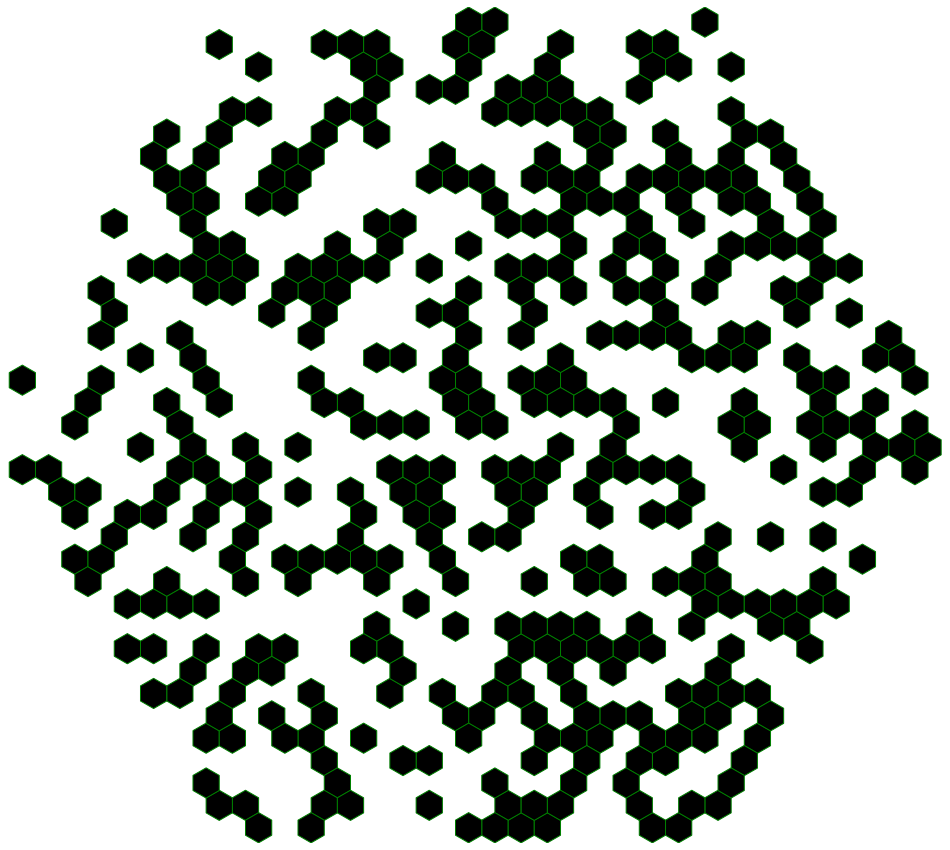

In [157]:
fig = createHexMap(flipped, min(x for x, y in flipped), max(x for x, y in flipped), 
             min(y for x, y in flipped), max(y for x, y in flipped))
display(fig)

In [158]:
def passDay(data):
    neighbours = [(2, 0), (1, -1), (-1, -1), (-2, 0), (-1, 1), (1, 1)]
    potentialPoints = list(set((x + xi, y + yi) for x, y in data for xi, yi in neighbours) | data)
    neighbours = [sum((x + xi, y + yi) in data for xi, yi in neighbours) for x, y in potentialPoints]
    for npoint, nn in zip(potentialPoints, neighbours):
        if npoint in data and (nn == 0 or nn > 2):
            data.remove(npoint)
        elif npoint not in data and nn == 2:
            data.add(npoint)
    return data

In [159]:
hexProgression = [set(flipped)]
for i in range(100):
    hexProgression.append(passDay(hexProgression[-1].copy()))
len(hexProgression[-1])

4206

In [160]:
def makeHexAnimation(data):
    xmin, xmax, ymin, ymax = (min(min(x for x, y in d) for d in data), max(max(x for x, y in d) for d in data), 
                              min(min(y for x, y in d) for d in data), max(max(y for x, y in d) for d in data))
    figures = [createHexMap(d, xmin, xmax, ymin, ymax) for d in data]
    playOutput(figures,defaulttime=45, mintime=20, maxtime=90)

In [161]:
makeHexAnimation(hexProgression)

## Day 25

In [162]:
pkey1, pkey2 = (11239946, 10464955)

In [163]:
def getLoopSize(pkey):
    loopSize = 1
    data = 1
    while True:
        data = data * 7 % 20201227
        if data == pkey:
            return loopSize
        loopSize += 1

In [165]:
ls1, ls2 = getLoopSize(pkey1), getLoopSize(pkey2)
print(ls1, ls2)

1665442 18474687


In [166]:
data = 1
for _ in range(ls1):
    data = data * pkey2 % 20201227
print(data)

711945


*Done*